# **Importing the Space Traffic Density Dataset**

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
data=pd.read_csv('space_traffic.csv')

# Understanding the dataset

In [ ]:
data.head()

,Timestamp,Location,Object_Type,Traffic_Density,Peak_Time
0,2024-10-21 21:00:00,Lagrange Point L2,Space Station,17,15:00
1,2024-10-11 05:00:00,Orbit LEO,Satellite,21,15:00
2,2024-10-29 13:00:00,Orbit LEO,Space Station,88,6:00
3,2024-10-24 08:00:00,Mars Transfer Orbit,Scientific Probe,65,8:00
4,2024-10-23 17:00:00,Lagrange Point L1,Space Station,9,6:00


In [ ]:
data.tail()

,Timestamp,Location,Object_Type,Traffic_Density,Peak_Time
995,2024-10-28 13:00:00,Orbit MEO,Asteroid Mining Ship,83,2:00
996,2024-10-13 01:00:00,Lagrange Point L1,Asteroid Mining Ship,71,17:00
997,2024-10-06 21:00:00,Orbit MEO,Space Debris,43,11:00
998,2024-10-03 06:00:00,Lagrange Point L2,Manned Spacecraft,14,0:00
999,2024-10-06 12:00:00,Lagrange Point L2,Space Debris,33,11:00


In [ ]:
data.shape

(1000, 5)

Observation: There are 1000 rows and 5 columns in our dataset

In [ ]:
data.columns

Index(['Timestamp', 'Location', 'Object_Type', 'Traffic_Density', 'Peak_Time'], dtype='object')

## Overview of the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Timestamp        1000 non-null   object
 1   Location         1000 non-null   object
 2   Object_Type      1000 non-null   object
 3   Traffic_Density  1000 non-null   int64 
 4   Peak_Time        1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


## Summary Statistics

In [ ]:
data.describe()

,Traffic_Density
count,1000.000000
mean,49.305000
std,28.023227
min,1.000000
25%,26.000000
50%,48.000000
75%,73.000000
max,100.000000


In [ ]:
data.nunique()

,0
Timestamp,529
Location,6
Object_Type,6
Traffic_Density,100
Peak_Time,24


Observation: In column location and object type, there are 6 unique values in the dataset.

In [ ]:
print(data['Location'].unique())
print(data['Object_Type'].unique())

['Lagrange Point L2' 'Orbit LEO' 'Mars Transfer Orbit' 'Lagrange Point L1'
 'Orbit GEO' 'Orbit MEO']
['Space Station' 'Satellite' 'Scientific Probe' 'Space Debris'
 'Manned Spacecraft' 'Asteroid Mining Ship']


# Cleaning the data for null values and outliers

In [ ]:
data.isnull().sum()

,0
Timestamp,0
Location,0
Object_Type,0
Traffic_Density,0
Peak_Time,0


Observation: There are no null values in the dataset.

In [ ]:
Q1 = data['Traffic_Density'].quantile(0.25)
Q3 = data['Traffic_Density'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on IQR
outliers_iqr = data[(data['Traffic_Density'] < (Q1 - 1.5 * IQR)) | (data['Traffic_Density'] > (Q3 + 1.5 * IQR))]
print(len(outliers_iqr))

0


Observation: There are no outliers present in the dataset.

In [ ]:
# Redundant or duplicate rows
duplicate_count = data.duplicated().sum()
print(f"Number of exact duplicate rows: {duplicate_count}")

Number of exact duplicate rows: 0


Observation: There are no duplicate or redundant data in the dataset.

# Univariate Analysis

## Numerical variable - Traffic_Density

Text(0, 0.5, 'Frequency')

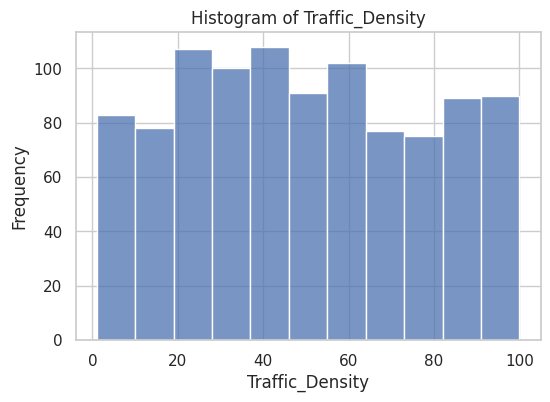

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(6,4))

# Histogram
sns.histplot(data['Traffic_Density'])
plt.title(f'Histogram of Traffic_Density')
plt.xlabel('Traffic_Density')
plt.ylabel('Frequency')

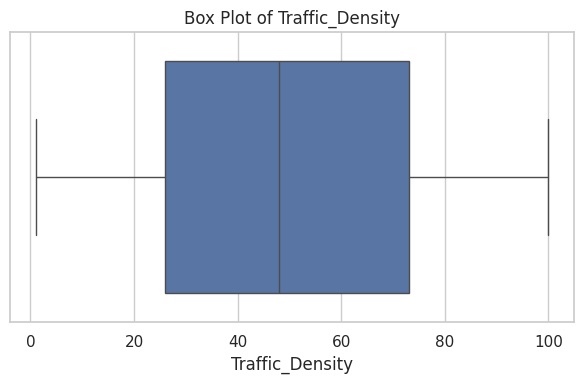

In [ ]:
# Box plot
plt.figure(figsize=(6,4))
sns.boxplot(x=data['Traffic_Density'])
plt.title(f'Box Plot of Traffic_Density')
plt.xlabel('Traffic_Density')

plt.tight_layout()
plt.show()

Observation: With box plots, we can detect the outliers. As you can visualize, there are no outliers in the Traffic_Density.


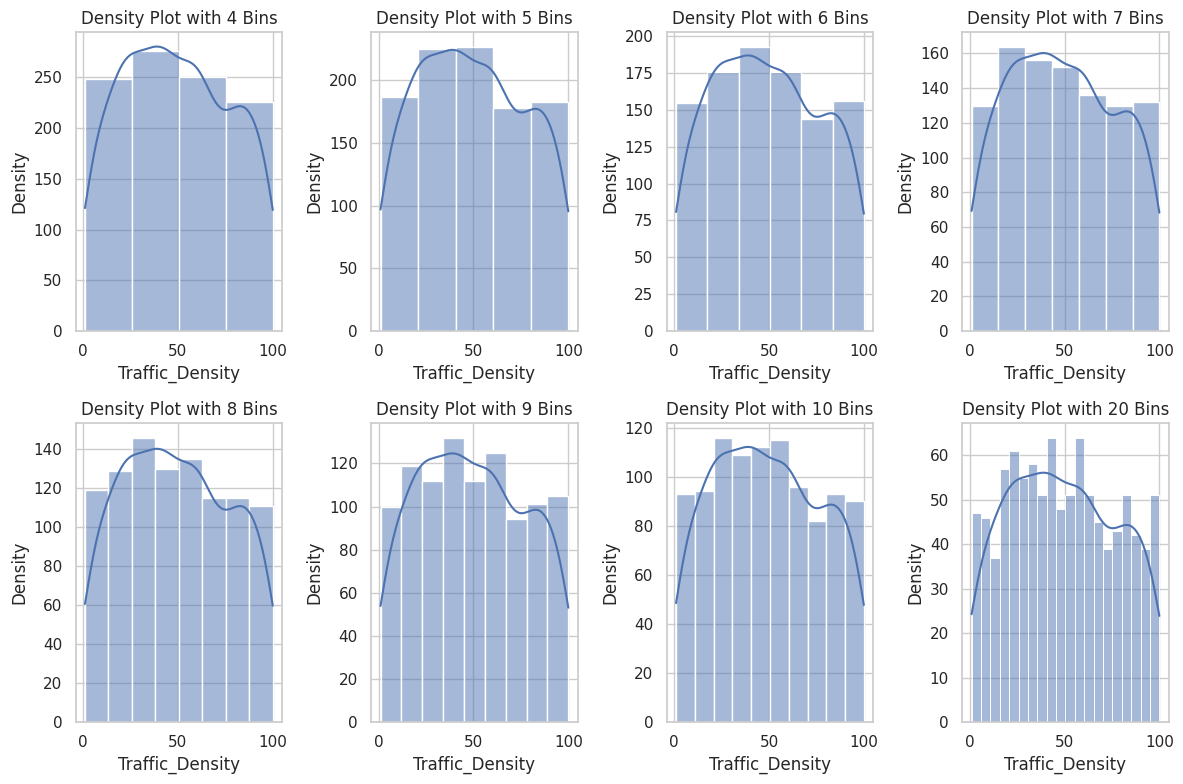

In [ ]:
# Density Plot
# Different bin sizes to visualize
bin_sizes = [4,5,6,7,8,9,10,20]

plt.figure(figsize=(12, 8))

for i, bins in enumerate(bin_sizes, start=1):
    plt.subplot(2, 4, i)
    sns.histplot(data['Traffic_Density'], bins=bins, kde=True)
    plt.title(f'Density Plot with {bins} Bins')
    plt.xlabel('Traffic_Density')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


Observation: Shows the distribution of Traffic_Density in the dataset.

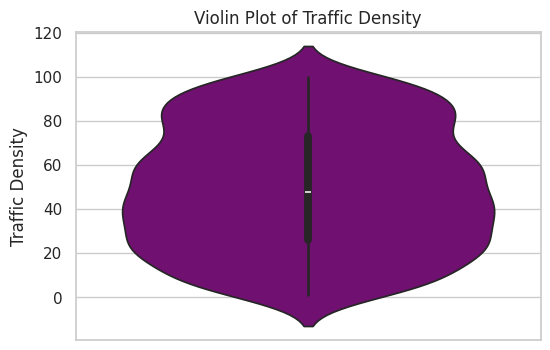

In [ ]:
plt.figure(figsize=(6, 4))
sns.violinplot(data=data, y='Traffic_Density', color='purple')
plt.title('Violin Plot of Traffic Density')
plt.ylabel('Traffic Density')
plt.show()

Observation: Through violin plot, we can analyse the statistical summary in the dataset. Here, the minimum value for the traffic density is 1 and maximum value for the traffic density is 100. Similarly, we can also analyse the 25th, 50th and 75th quartile ranges.

Skewness of Traffic_Density: 0.09212771895981223


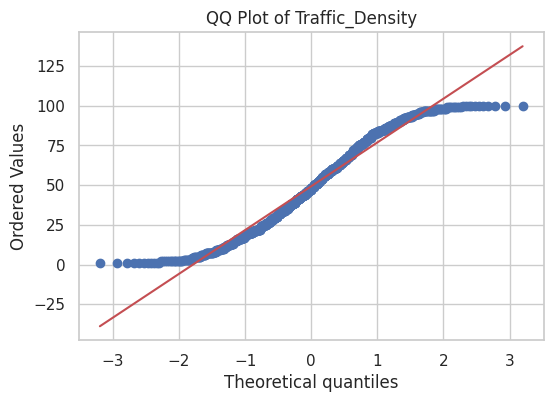

In [ ]:
from scipy.stats import skew
import scipy.stats as stats

# Calculate skewness
skewness = skew(data['Traffic_Density'].dropna())
print(f'Skewness of Traffic_Density: {skewness}')

# QQ-plot for normality check
plt.figure(figsize=(6, 4))
stats.probplot(data['Traffic_Density'].dropna(), dist="norm", plot=plt)
plt.title('QQ Plot of Traffic_Density')
plt.show()


Observation: A skewness value of 0.092 for Traffic_Density suggests that the distribution is nearly symmetric.
Since the skewness is close to 0, the data is nearly
symmetric, meaning the values on either side of the mean are fairly balanced.
In practical terms, this suggests that the Traffic_Density values are evenly spread around the central value, without a significant lean toward higher or lower values.



## Categorical variables - 'Object_Type','Location','Peak_Time'

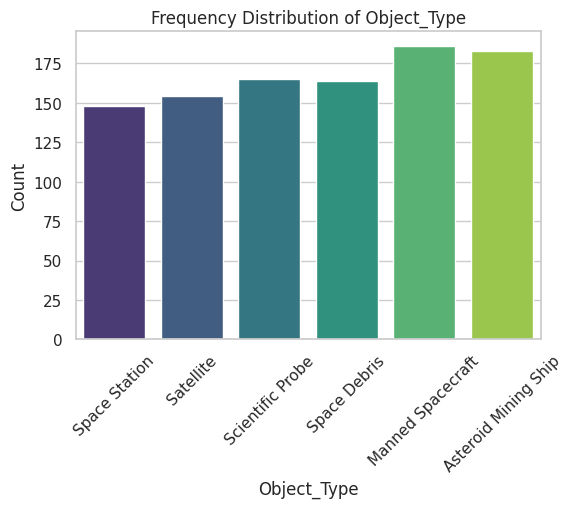

Frequency Table for Object_Type:
 Object_Type
Manned Spacecraft       186
Asteroid Mining Ship    183
Scientific Probe        165
Space Debris            164
Satellite               154
Space Station           148
Name: count, dtype: int64




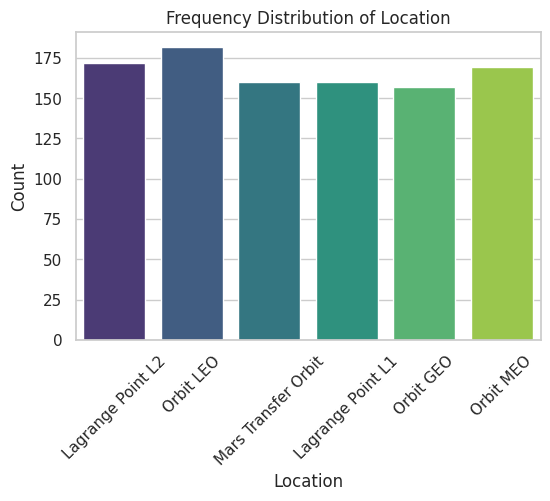

Frequency Table for Location:
 Location
Orbit LEO              182
Lagrange Point L2      172
Orbit MEO              169
Mars Transfer Orbit    160
Lagrange Point L1      160
Orbit GEO              157
Name: count, dtype: int64




In [ ]:
categorical_features = ['Object_Type','Location']

# Plot frequency distribution for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=feature, palette="viridis")
    plt.title(f'Frequency Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Display frequency table
    print(f"Frequency Table for {feature}:\n", data[feature].value_counts())
    print("\n" + "="*50 + "\n")


Observation: This shows the frequency distribution for each category within the categorical variables Object_Type and Location. The dataset contains a higher frequency of the Object_Type category "Manned spacecraft," and similarly, "Orbit LEO" appears most frequently under Location.

# Bivariate Analysis

## Numerical vs Categorical variable analysis


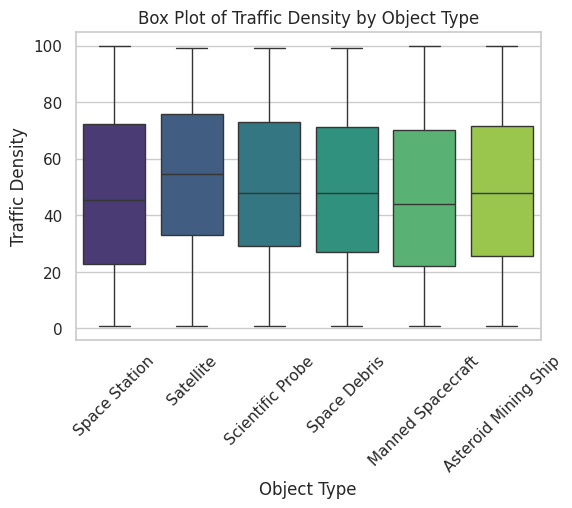

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='Object_Type', y='Traffic_Density', palette='viridis')
plt.title('Box Plot of Traffic Density by Object Type')
plt.xlabel('Object Type')
plt.ylabel('Traffic Density')
plt.xticks(rotation=45)
plt.show()


Observation: Distribution of Traffic Density with respect to each of the object type in the dataset. Here, Satellite is providing higher average traffic density compared to others.

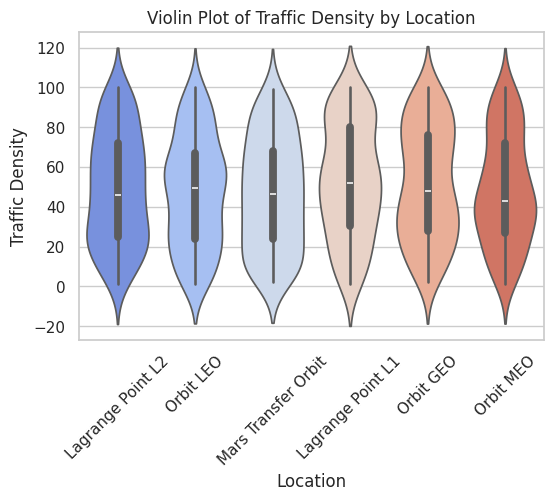

In [ ]:
plt.figure(figsize=(6, 4))
sns.violinplot(data=data, x='Location', y='Traffic_Density', palette='coolwarm')
plt.title('Violin Plot of Traffic Density by Location')
plt.xlabel('Location')
plt.ylabel('Traffic Density')
plt.xticks(rotation=45)
plt.show()


Observation: Distribution of Traffic Density with respect to each of the location in the dataset. Here, Lagrange Point L1 can be seen with relatively higher average traffic density.

In [ ]:
from scipy.stats import f_oneway

# ANOVA test for Traffic Density across different Object Types
density_by_object_type = [data[data['Object_Type'] == obj_type]['Traffic_Density'] for obj_type in data['Object_Type'].unique()]
f_stat, p_val = f_oneway(*density_by_object_type)
print("ANOVA Test Results for Object Types:")
print(f"F-statistic: {f_stat}, p-value: {p_val}")

# ANOVA test for Traffic Density across different Locations
density_by_location = [data[data['Location'] == location]['Traffic_Density'] for location in data['Location'].unique()]
f_stat_loc, p_val_loc = f_oneway(*density_by_location)
print("\nANOVA Test Results for Locations:")
print(f"F-statistic: {f_stat_loc}, p-value: {p_val_loc}")


ANOVA Test Results for Object Types:
F-statistic: 0.9250562465910008, p-value: 0.46379219161782215

ANOVA Test Results for Locations:
F-statistic: 1.1363551707008797, p-value: 0.33922836554505187


Observation: ANOVA test for Object Types shows a high p-value (0.46), indicating no statistically significant difference in traffic density across different object types.

Similarly, the ANOVA test for Locations yields a high p-value (0.34), suggesting no significant difference in traffic density between various locations.

## Categorical vs Categorical variable analysis

In [ ]:
contingency_table = pd.crosstab(data['Object_Type'], data['Location'])
print(contingency_table)

Location              Lagrange Point L1  Lagrange Point L2  \
Object_Type                                                  
Asteroid Mining Ship                 28                 29   
Manned Spacecraft                    30                 43   
Satellite                            27                 19   
Scientific Probe                     21                 28   
Space Debris                         30                 25   
Space Station                        24                 28   

Location              Mars Transfer Orbit  Orbit GEO  Orbit LEO  Orbit MEO  
Object_Type                                                                 
Asteroid Mining Ship                   36         28         32         30  
Manned Spacecraft                      30         23         25         35  
Satellite                              19         22         35         32  
Scientific Probe                       32         29         36         19  
Space Debris                           25

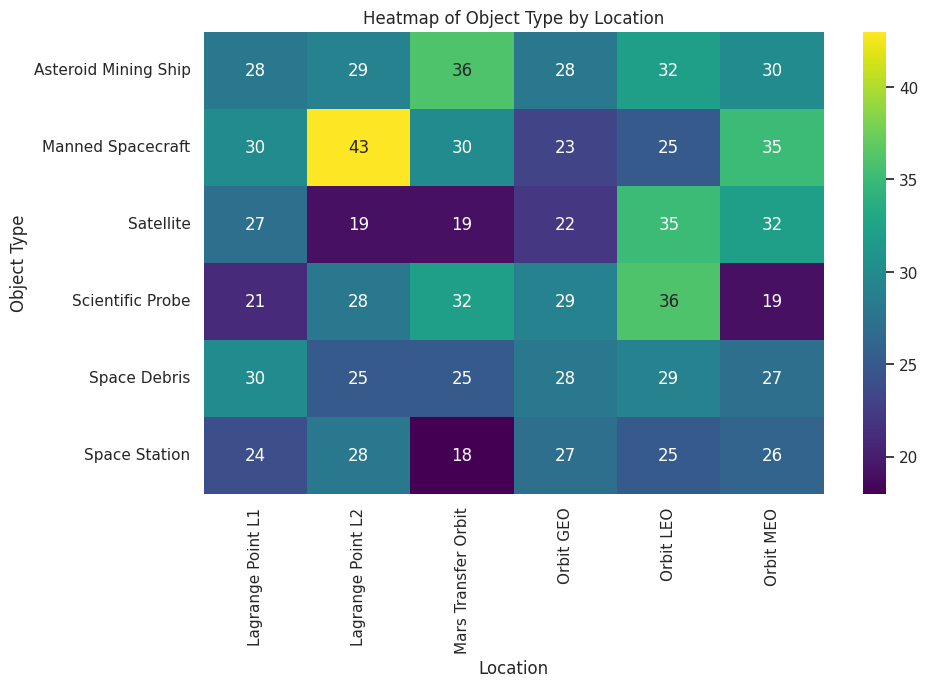

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='viridis')
plt.title('Heatmap of Object Type by Location')
plt.xlabel('Location')
plt.ylabel('Object Type')
plt.show()

Observation: In this heatmap, color intensity represents the frequency of each object type at different locations. Darker shades indicate lower frequencies, while lighter shades show higher frequencies.

In [ ]:
# Chi - square test for categorical variables
from scipy.stats import chi2_contingency

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

Chi-Square Statistic: 26.950064322738495
p-value: 0.3583838432360298
Degrees of Freedom: 25


Observation: The chi-square test yields a p-value of 0.36, which is higher than common significance levels, suggesting no statistically significant association between Object type and Location. With 25 degrees of freedom, the observed distribution does not significantly deviate from expected frequencies.

# Time Series Analysis


In [ ]:
dt=pd.read_csv('space_traffic.csv')
dt['Timestamp'] = pd.to_datetime(dt['Timestamp'])
dt.sort_values('Timestamp', inplace=True)

dt.set_index('Timestamp', inplace=True)

print(dt.head())

                                Location           Object_Type  \
Timestamp                                                        
2024-10-01 00:00:00    Lagrange Point L1      Scientific Probe   
2024-10-01 01:00:00            Orbit LEO  Asteroid Mining Ship   
2024-10-01 01:00:00    Lagrange Point L1             Satellite   
2024-10-01 02:00:00            Orbit LEO  Asteroid Mining Ship   
2024-10-01 02:00:00  Mars Transfer Orbit         Space Station   

                     Traffic_Density Peak_Time  
Timestamp                                       
2024-10-01 00:00:00                2     21:00  
2024-10-01 01:00:00                2      3:00  
2024-10-01 01:00:00               53      2:00  
2024-10-01 02:00:00               28     14:00  
2024-10-01 02:00:00               66      8:00  


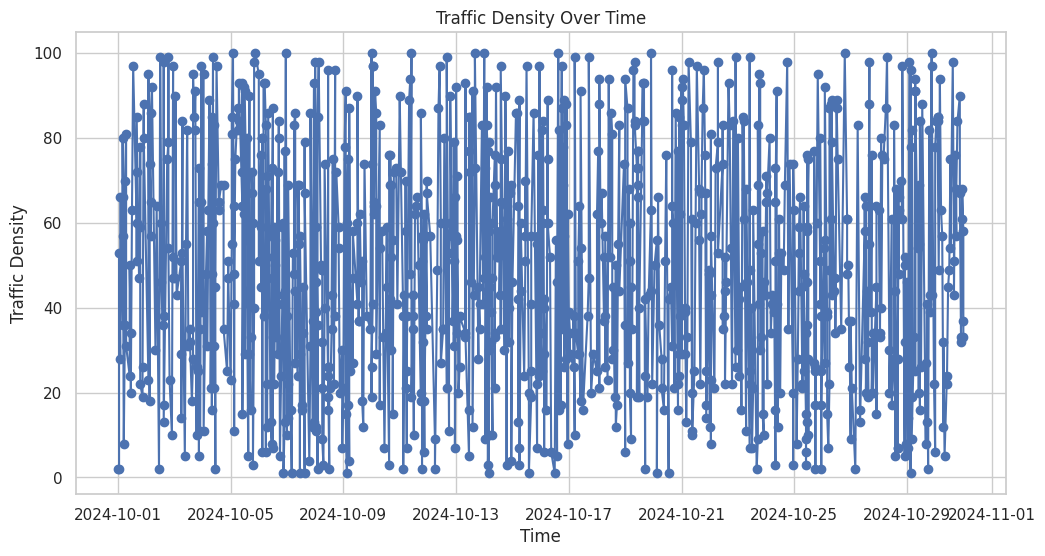

In [ ]:
# Plotting traffic density over time
plt.figure(figsize=(12, 6))
plt.plot(dt.index, dt['Traffic_Density'], marker='o', linestyle='-', color='b')
plt.title('Traffic Density Over Time')
plt.xlabel('Time')
plt.ylabel('Traffic Density')
plt.grid(True)
plt.show()

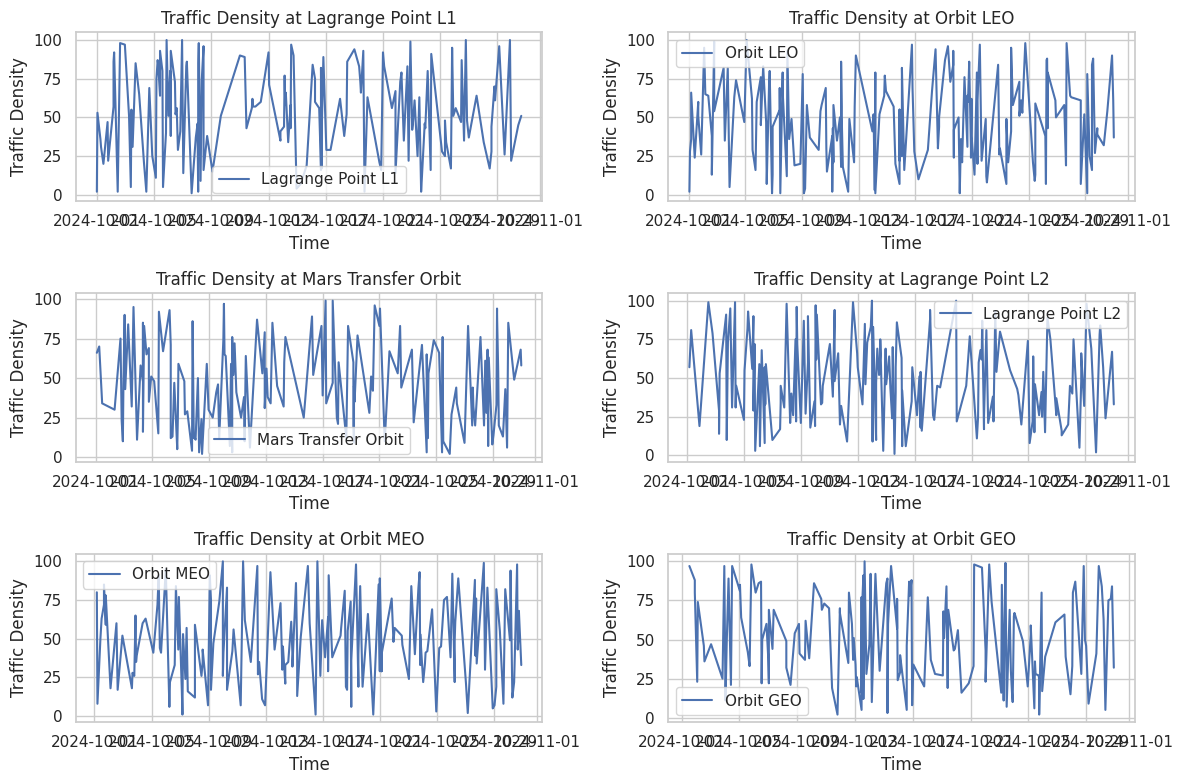

In [ ]:
# Plotting Traffic Density for each Location
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
axes = axes.flatten()

for i, location in enumerate(dt['Location'].unique()):
    location_data = dt[dt['Location'] == location]
    axes[i].plot(location_data.index, location_data['Traffic_Density'], label=location, color='b')

    axes[i].set_title(f'Traffic Density at {location}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Traffic Density')
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()

plt.show()

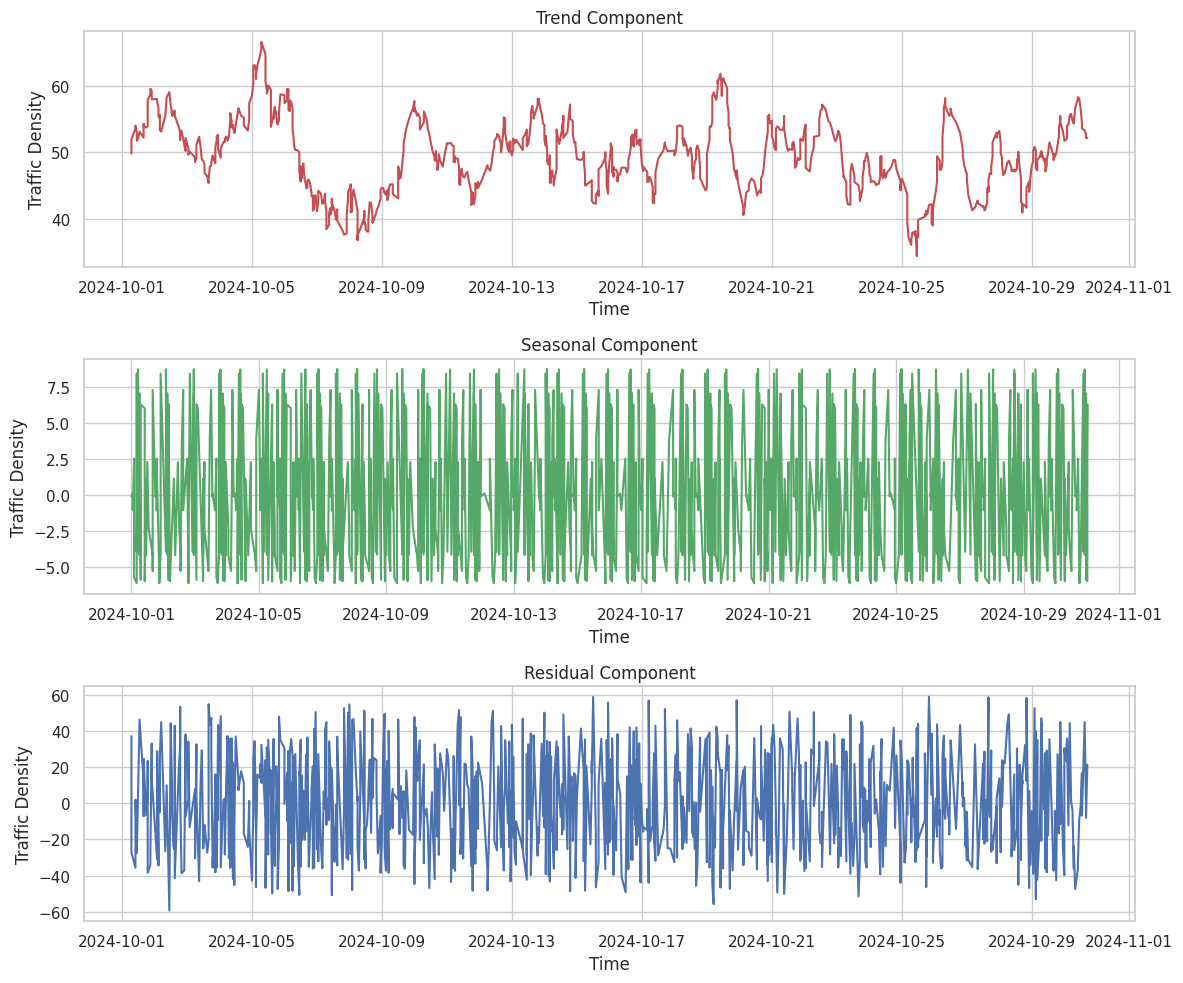

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(dt['Traffic_Density'], model='additive', period=24)

# Plot the decomposed components (trend, seasonal, residual)
plt.figure(figsize=(12, 10))

# Trend plot
plt.subplot(3, 1, 1)
plt.plot(result.trend, color='r')
plt.title('Trend Component')
plt.xlabel('Time')
plt.ylabel('Traffic Density')
plt.grid(True)

# Seasonal plot
plt.subplot(3, 1, 2)
plt.plot(result.seasonal, color='g')
plt.title('Seasonal Component')
plt.xlabel('Time')
plt.ylabel('Traffic Density')
plt.grid(True)

# Residual plot
plt.subplot(3, 1, 3)
plt.plot(result.resid, color='b')
plt.title('Residual Component')
plt.xlabel('Time')
plt.ylabel('Traffic Density')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF Test for stationarity
adf_result = adfuller(dt['Traffic_Density'])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

ADF Statistic: -30.886227318767325
p-value: 0.0


# Other Insights in the dataset

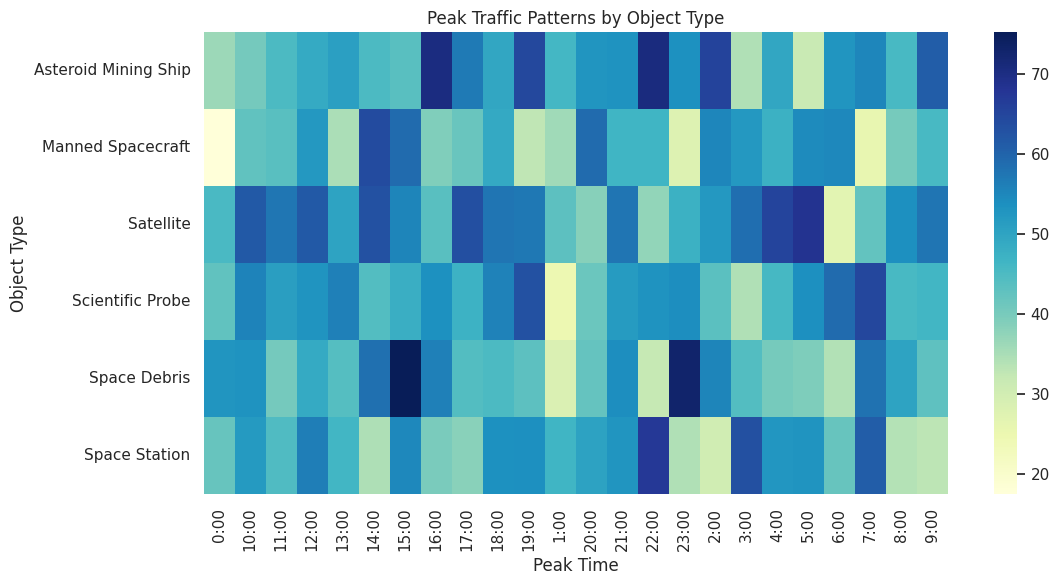

In [ ]:
# Group by Object_Type and Peak_Time to calculate mean traffic density for each type at different times
peak_traffic = data.groupby(['Object_Type', 'Peak_Time'])['Traffic_Density'].mean().unstack()

# Plot heatmap for peak times by object type
plt.figure(figsize=(12, 6))
sns.heatmap(peak_traffic, cmap="YlGnBu", fmt=".2f")
plt.title("Peak Traffic Patterns by Object Type")
plt.xlabel("Peak Time")
plt.ylabel("Object Type")
plt.show()


Observation: Understanding the peak hours for each object type in the dataset. Darker shades indicates peak hours , while lighter shades indicates not so peak hours.

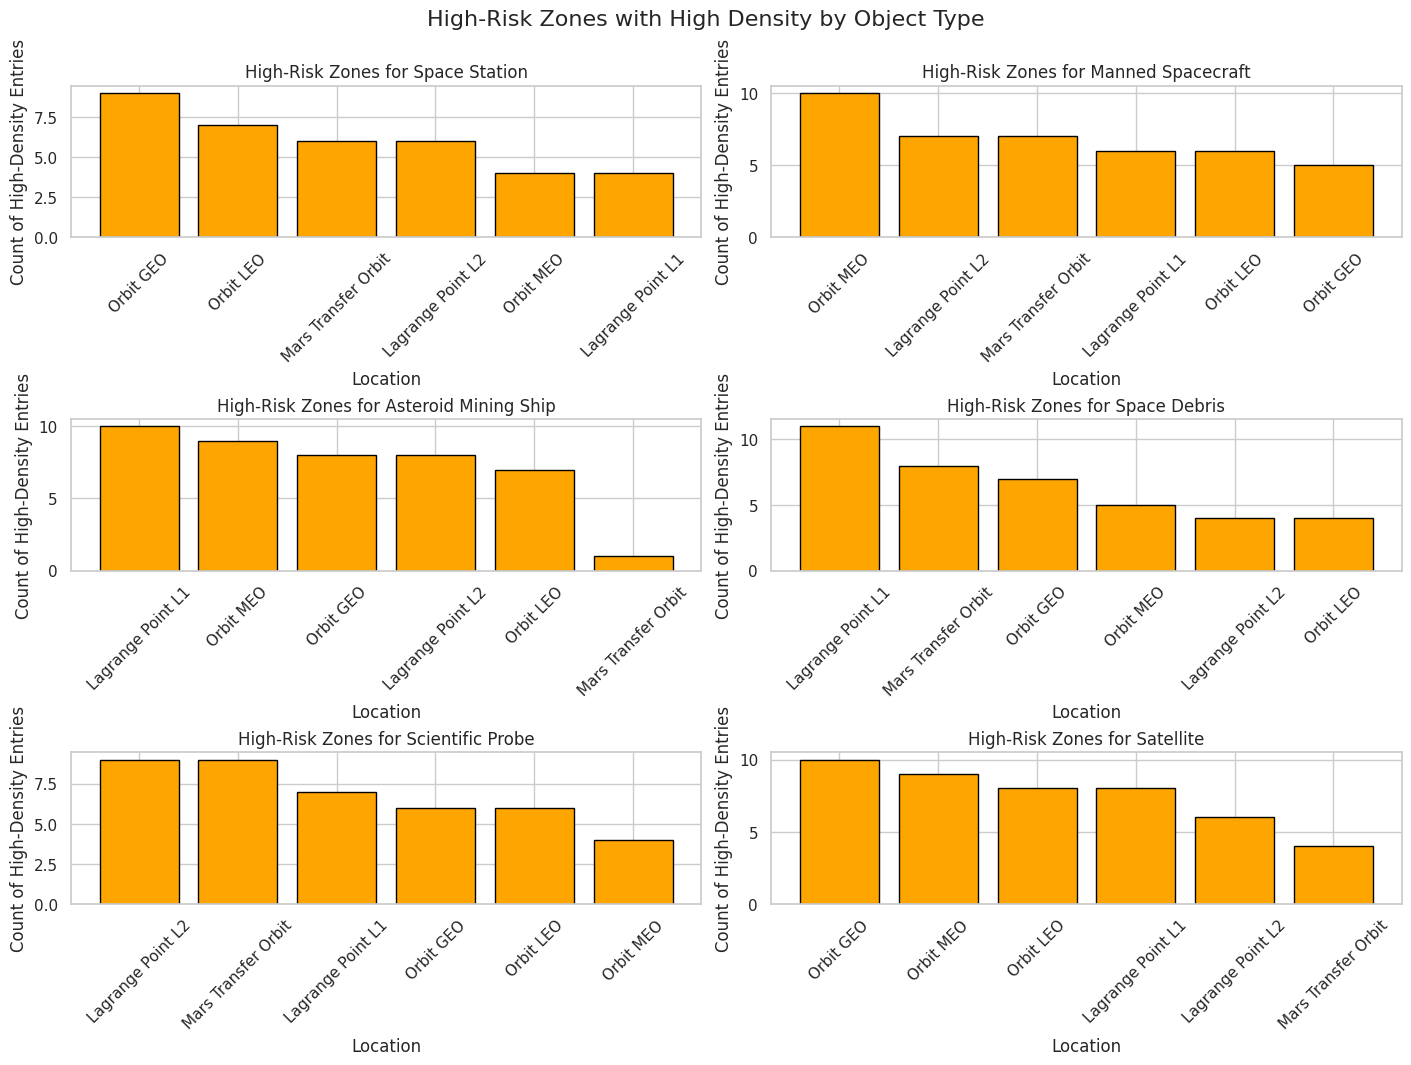

In [ ]:
# Identify high-density zones (top 25% of traffic density)
high_density_zones = data[data['Traffic_Density'] > data['Traffic_Density'].quantile(0.75)]

object_types = high_density_zones['Object_Type'].unique()

num_objects = len(object_types)
fig, axes = plt.subplots(nrows=(num_objects + 1) // 2, ncols=2, figsize=(14, 10), constrained_layout=True)
axes = axes.flatten()

# Plot high-risk areas for each object type
for i, obj_type in enumerate(object_types):
    risk_zones = high_density_zones[high_density_zones['Object_Type'] == obj_type]

    risk_location_counts = risk_zones['Location'].value_counts()

    axes[i].bar(risk_location_counts.index, risk_location_counts.values, color='orange', edgecolor='black')
    axes[i].set_title(f"High-Risk Zones for {obj_type}")
    axes[i].set_xlabel("Location")
    axes[i].set_ylabel("Count of High-Density Entries")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("High-Risk Zones with High Density by Object Type", fontsize=16, y=1.05)
plt.show()

Observation:
*   With respect to Space Station, the traffic density is high in Orbit GEO.

*  With respect to Asteroid Mining Ship, the traffic density is high in Lagrange Point L1.

*   With respect to Manned Spacecraft, the traffic density is high in Orbit MEO.
*   With respect to Space Debris, the traffic density is high in Lagrange Point L1.

*  With respect to Scientific Probe, the traffic density is high for both Lagrange Point L2 and Mars Transfer Orbit.

*   With respect to Satellite, the traffic density is high in Orbit GEO.












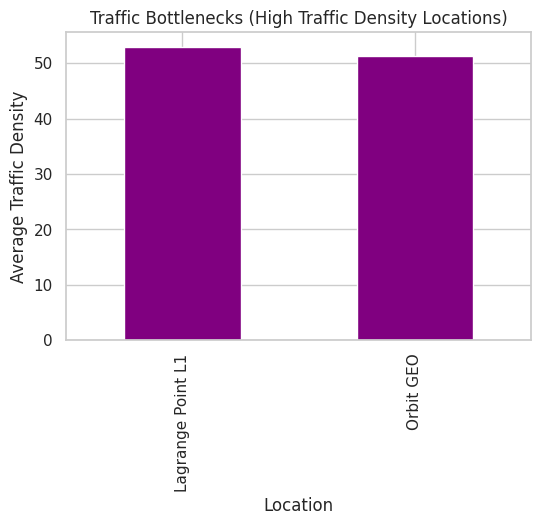

In [ ]:
# Identify locations with consistently high traffic density
high_density_zones = data.groupby('Location')['Traffic_Density'].mean()
bottlenecks = high_density_zones[high_density_zones > high_density_zones.quantile(0.75)]

# Plot bottleneck locations
plt.figure(figsize=(6,4))
bottlenecks.plot(kind='bar', color='purple')
plt.title("Traffic Bottlenecks (High Traffic Density Locations)")
plt.xlabel("Location")
plt.ylabel("Average Traffic Density")
plt.show()


Observation: The locations with highest traffic density are Lagrange Point L1 and Orbit GEO.

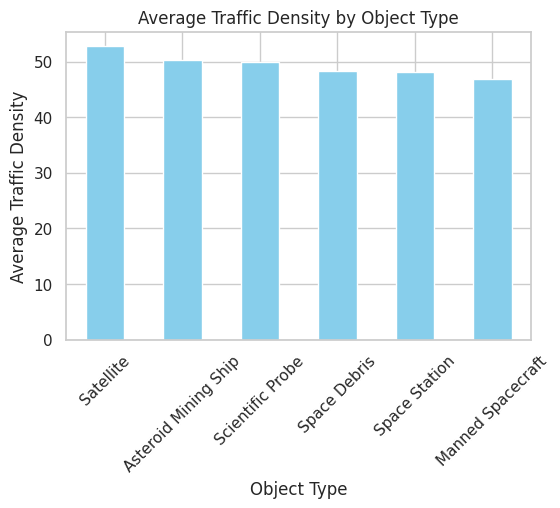

In [ ]:
plt.figure(figsize=(6, 4))
data.groupby('Object_Type')['Traffic_Density'].mean().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Traffic Density by Object Type')
plt.xlabel('Object Type')
plt.ylabel('Average Traffic Density')
plt.xticks(rotation=45)
plt.show()

Observation: The Traffic density is consistently higher on average with the object type -Satellite.

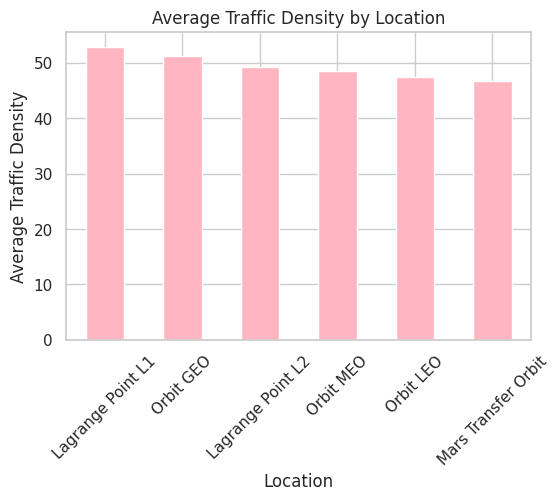

In [ ]:
plt.figure(figsize=(6, 4))
data.groupby('Location')['Traffic_Density'].mean().sort_values(ascending=False).plot(kind='bar', color='lightpink')
plt.title('Average Traffic Density by Location')
plt.xlabel('Location')
plt.ylabel('Average Traffic Density')
plt.xticks(rotation=45)
plt.show()

Observation: The Traffic density is consistently higher on average in Lagrange Point L1

In [ ]:
# Analysing Traffic density for each location
orbital_traffic = data.groupby('Location')['Traffic_Density'].mean()
print(orbital_traffic)

Location
Lagrange Point L1      52.943750
Lagrange Point L2      49.226744
Mars Transfer Orbit    46.762500
Orbit GEO              51.254777
Orbit LEO              47.500000
Orbit MEO              48.479290
Name: Traffic_Density, dtype: float64


In [ ]:
# Analyzing the traffic density during peak time
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['hour'] = data['Timestamp'].dt.hour

data['Peak_Hour'] = pd.to_datetime(data['Peak_Time'], format='%H:%M').dt.hour

# Filter rows where Peak_Time matches the hour and calculate mean Traffic_Density
peak_traffic = data[data['hour'] == data['Peak_Hour']]['Traffic_Density'].mean()
print(f"Average Traffic Density during Peak Time: {peak_traffic}")


Average Traffic Density during Peak Time: 53.282051282051285


# **Feature Engineering**

## Feature Creation

In [ ]:
data=pd.read_csv('space_traffic.csv')

data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data['hour'] = data['Timestamp'].dt.hour
data['day_of_week'] = data['Timestamp'].dt.dayofweek
data['month'] = data['Timestamp'].dt.month
data['day'] = data['Timestamp'].dt.day

print(data[['Timestamp', 'hour', 'day_of_week', 'month']])

              Timestamp  hour  day_of_week  month
0   2024-10-21 21:00:00    21            0     10
1   2024-10-11 05:00:00     5            4     10
2   2024-10-29 13:00:00    13            1     10
3   2024-10-24 08:00:00     8            3     10
4   2024-10-23 17:00:00    17            2     10
..                  ...   ...          ...    ...
995 2024-10-28 13:00:00    13            0     10
996 2024-10-13 01:00:00     1            6     10
997 2024-10-06 21:00:00    21            6     10
998 2024-10-03 06:00:00     6            3     10
999 2024-10-06 12:00:00    12            6     10

[1000 rows x 4 columns]


## One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply OneHotEncoder to categorical features
categorical_features = ["Location", "Object_Type"]
encoded_features = encoder.fit_transform(data[categorical_features])

# Convert the encoded features into a DataFrame
encoded_data = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

encoded_data = encoded_data.astype(int)

# Concatenate the original data with the encoded features
data_encoded = pd.concat([data.reset_index(drop=True), encoded_data], axis=1)

# Drop the original categorical columns
data_encoded = data_encoded.drop(columns=categorical_features)

print(data_encoded.head())

            Timestamp  Traffic_Density Peak_Time  hour  day_of_week  month  \
0 2024-10-21 21:00:00               17     15:00    21            0     10   
1 2024-10-11 05:00:00               21     15:00     5            4     10   
2 2024-10-29 13:00:00               88      6:00    13            1     10   
3 2024-10-24 08:00:00               65      8:00     8            3     10   
4 2024-10-23 17:00:00                9      6:00    17            2     10   

   day  Location_Lagrange Point L1  Location_Lagrange Point L2  \
0   21                           0                           1   
1   11                           0                           0   
2   29                           0                           0   
3   24                           0                           0   
4   23                           1                           0   

   Location_Mars Transfer Orbit  Location_Orbit GEO  Location_Orbit LEO  \
0                             0                   0        

### Dummy Variable Trap

In [ ]:
# Initialize the OneHotEncoder with drop_first=True to avoid dummy variable trap
d_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')

d_encoded_features = d_encoder.fit_transform(data[categorical_features])

d_encoded_data = pd.DataFrame(d_encoded_features, columns=d_encoder.get_feature_names_out(categorical_features))
d_encoded_data = d_encoded_data.astype(int)

data_encoded_dummy_trap = pd.concat([data.reset_index(drop=True), d_encoded_data], axis=1)
data_encoded_dummy_trap = data_encoded_dummy_trap.drop(columns=categorical_features)

print(data_encoded_dummy_trap.head())

            Timestamp  Traffic_Density Peak_Time  hour  day_of_week  month  \
0 2024-10-21 21:00:00               17     15:00    21            0     10   
1 2024-10-11 05:00:00               21     15:00     5            4     10   
2 2024-10-29 13:00:00               88      6:00    13            1     10   
3 2024-10-24 08:00:00               65      8:00     8            3     10   
4 2024-10-23 17:00:00                9      6:00    17            2     10   

   day  Location_Lagrange Point L2  Location_Mars Transfer Orbit  \
0   21                           1                             0   
1   11                           0                             0   
2   29                           0                             0   
3   24                           0                             1   
4   23                           0                             0   

   Location_Orbit GEO  Location_Orbit LEO  Location_Orbit MEO  \
0                   0                   0                

## Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column and create new columns for the encoded labels
for feature in categorical_features:
    data[feature] = encoder.fit_transform(data[feature])
    print(f"Mapping for {feature}: {dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))}")

print(data.head())

Mapping for Location: {'Lagrange Point L1': 0, 'Lagrange Point L2': 1, 'Mars Transfer Orbit': 2, 'Orbit GEO': 3, 'Orbit LEO': 4, 'Orbit MEO': 5}
Mapping for Object_Type: {'Asteroid Mining Ship': 0, 'Manned Spacecraft': 1, 'Satellite': 2, 'Scientific Probe': 3, 'Space Debris': 4, 'Space Station': 5}
            Timestamp  Location  Object_Type  Traffic_Density Peak_Time  hour  \
0 2024-10-21 21:00:00         1            5               17     15:00    21   
1 2024-10-11 05:00:00         4            2               21     15:00     5   
2 2024-10-29 13:00:00         4            5               88      6:00    13   
3 2024-10-24 08:00:00         2            3               65      8:00     8   
4 2024-10-23 17:00:00         0            5                9      6:00    17   

   day_of_week  month  day  
0            0     10   21  
1            4     10   11  
2            1     10   29  
3            3     10   24  
4            2     10   23  


## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = ["Traffic_Density"]

# Apply StandardScaler to numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_features])

# Convert scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numerical_features)

# Display the scaled numerical features
print(scaled_df)


     Traffic_Density
0          -1.153371
1          -1.010560
2           1.381510
3           0.560351
4          -1.438991
..               ...
995         1.202997
996         0.774567
997        -0.225105
998        -1.260478
999        -0.582130

[1000 rows x 1 columns]


## Column Transformer

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

df = pd.read_csv('space_traffic.csv')

numerical_features = ["Traffic_Density"]
categorical_features = ["Location", "Object_Type"]

# Define ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Standardize Traffic_Density
        ('cat', OneHotEncoder(sparse_output=False), categorical_features)  # OneHotEncode categorical columns
    ]
)

# Apply transformation
transformed_data = preprocessor.fit_transform(df)

ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)

transformed_df = pd.DataFrame(transformed_data, columns=all_feature_names)

final_df = pd.concat([df[['Timestamp', 'Peak_Time']].reset_index(drop=True), transformed_df], axis=1)

cat_columns = [col for col in final_df.columns if any(col.startswith(cat) for cat in categorical_features)]
final_df[cat_columns] = final_df[cat_columns].astype(int)

print("Final DataFrame:\n", final_df)

Final DataFrame:
                Timestamp Peak_Time  Traffic_Density  \
0    2024-10-21 21:00:00     15:00        -1.153371   
1    2024-10-11 05:00:00     15:00        -1.010560   
2    2024-10-29 13:00:00      6:00         1.381510   
3    2024-10-24 08:00:00      8:00         0.560351   
4    2024-10-23 17:00:00      6:00        -1.438991   
..                   ...       ...              ...   
995  2024-10-28 13:00:00      2:00         1.202997   
996  2024-10-13 01:00:00     17:00         0.774567   
997  2024-10-06 21:00:00     11:00        -0.225105   
998  2024-10-03 06:00:00      0:00        -1.260478   
999  2024-10-06 12:00:00     11:00        -0.582130   

     Location_Lagrange Point L1  Location_Lagrange Point L2  \
0                             0                           1   
1                             0                           0   
2                             0                           0   
3                             0                           0   
4     

In [ ]:
final_df.head()

,Timestamp,Peak_Time,Traffic_Density,Location_Lagrange Point L1,Location_Lagrange Point L2,Location_Mars Transfer Orbit,Location_Orbit GEO,Location_Orbit LEO,Location_Orbit MEO,Object_Type_Asteroid Mining Ship,Object_Type_Manned Spacecraft,Object_Type_Satellite,Object_Type_Scientific Probe,Object_Type_Space Debris,Object_Type_Space Station
0,2024-10-21 21:00:00,15:00,-1.153371,0,1,0,0,0,0,0,0,0,0,0,1
1,2024-10-11 05:00:00,15:00,-1.010560,0,0,0,0,1,0,0,0,1,0,0,0
2,2024-10-29 13:00:00,6:00,1.381510,0,0,0,0,1,0,0,0,0,0,0,1
3,2024-10-24 08:00:00,8:00,0.560351,0,0,1,0,0,0,0,0,0,1,0,0
4,2024-10-23 17:00:00,6:00,-1.438991,1,0,0,0,0,0,0,0,0,0,0,1


#  Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = final_df.drop(columns=['Traffic_Density', 'Timestamp', 'Peak_Time'])  # Features
y = final_df['Traffic_Density']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Predictions on Test Data

In [ ]:
y_pred = model.predict(X_test)

Performance Metrics

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: -0.02791707292615664


Mean Absolute Error (MAE)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)


MAE: 0.8953147554925077


Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("MSE:", mse)
print("RMSE:", rmse)


MSE: 1.0491820428647092
RMSE: 1.0242958766219403


In [ ]:
#including time features
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

final_df['Timestamp'] = pd.to_datetime(final_df['Timestamp'])

final_df['hour'] = final_df['Timestamp'].dt.hour
final_df['day_of_week'] = final_df['Timestamp'].dt.dayofweek
final_df['day'] = final_df['Timestamp'].dt.day

X1 = final_df.drop(columns=['Traffic_Density', 'Timestamp','Peak_Time'])  # Features
y1 = final_df['Traffic_Density']  # Target variable

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X1_train, y1_train)

y1_pred = model.predict(X1_test)

from sklearn.metrics import r2_score
r2 = r2_score(y1_test, y1_pred)
print("R-squared:", r2)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y1_test, y1_pred)
print("MAE:", mae)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y1_test, y1_pred)
rmse = mse ** 0.5
print("MSE:", mse)
print("RMSE:", rmse)


R-squared: -0.02870805513371022
MAE: 0.8937910518474433
MSE: 1.0499893884670428
RMSE: 1.024689898684984


In [ ]:
final_df.columns

Index(['Timestamp', 'Peak_Time', 'Traffic_Density',
       'Location_Lagrange Point L1', 'Location_Lagrange Point L2',
       'Location_Mars Transfer Orbit', 'Location_Orbit GEO',
       'Location_Orbit LEO', 'Location_Orbit MEO',
       'Object_Type_Asteroid Mining Ship', 'Object_Type_Manned Spacecraft',
       'Object_Type_Satellite', 'Object_Type_Scientific Probe',
       'Object_Type_Space Debris', 'Object_Type_Space Station', 'hour',
       'day_of_week', 'day'],
      dtype='object')

Analyze Feature Coefficients

In [ ]:
coefficients = model.coef_
features = X1.columns
for feature, coef in zip(features, coefficients):
    print(f"Feature: {feature}, Coefficient: {coef}")


Feature: Location_Lagrange Point L1, Coefficient: 0.13033963701579612
Feature: Location_Lagrange Point L2, Coefficient: 0.048783114427661534
Feature: Location_Mars Transfer Orbit, Coefficient: -0.1905745531081942
Feature: Location_Orbit GEO, Coefficient: 0.1018001773511364
Feature: Location_Orbit LEO, Coefficient: -0.08127346532683935
Feature: Location_Orbit MEO, Coefficient: -0.009074910359560567
Feature: Object_Type_Asteroid Mining Ship, Coefficient: 0.06956191617423677
Feature: Object_Type_Manned Spacecraft, Coefficient: -0.07255529233573287
Feature: Object_Type_Satellite, Coefficient: 0.09859869717605955
Feature: Object_Type_Scientific Probe, Coefficient: 0.055347763528843796
Feature: Object_Type_Space Debris, Coefficient: -0.0963061842800422
Feature: Object_Type_Space Station, Coefficient: -0.054646900263365016
Feature: hour, Coefficient: -0.005229362462485672
Feature: day_of_week, Coefficient: 0.008867039868284084
Feature: day, Coefficient: -0.0033822640393281443


Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
selector = RFE(model, n_features_to_select=5)
selector.fit(X1_train, y1_train)
print("Selected Features:", X1.columns[selector.support_])


Selected Features: Index(['Object_Type_Manned Spacecraft', 'Object_Type_Satellite',
       'Object_Type_Scientific Probe', 'Object_Type_Space Debris',
       'Object_Type_Space Station'],
      dtype='object')


Address Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X1.columns
vif_data["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(len(X1.columns))]
print(vif_data)


                             Feature       VIF
0         Location_Lagrange Point L1       inf
1         Location_Lagrange Point L2       inf
2       Location_Mars Transfer Orbit       inf
3                 Location_Orbit GEO       inf
4                 Location_Orbit LEO       inf
5                 Location_Orbit MEO       inf
6   Object_Type_Asteroid Mining Ship       inf
7      Object_Type_Manned Spacecraft       inf
8              Object_Type_Satellite       inf
9       Object_Type_Scientific Probe       inf
10          Object_Type_Space Debris       inf
11         Object_Type_Space Station       inf
12                              hour  1.014678
13                       day_of_week  1.021321
14                               day  1.012988


#Validate Model Robustness

 Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X1, y1, cv=5, scoring='r2')
print("Cross-Validation R2 Scores:", cv_scores)
print("Mean R2 Score:", cv_scores.mean())


Cross-Validation R2 Scores: [-0.01600956 -0.02563016 -0.0065722  -0.00850494 -0.0177432 ]
Mean R2 Score: -0.014892010536299339


 Residual Analysis

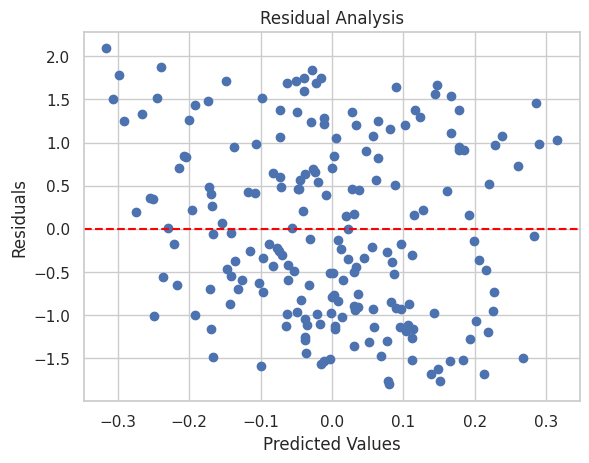

In [ ]:
import matplotlib.pyplot as plt
residuals = y1_test - y1_pred
plt.scatter(y1_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()


Time-Series Specific Validation

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X1):
    print("Train:", train_index, "Test:", test_index)


Train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169] Test: [170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242

Bar Plot of Coefficients

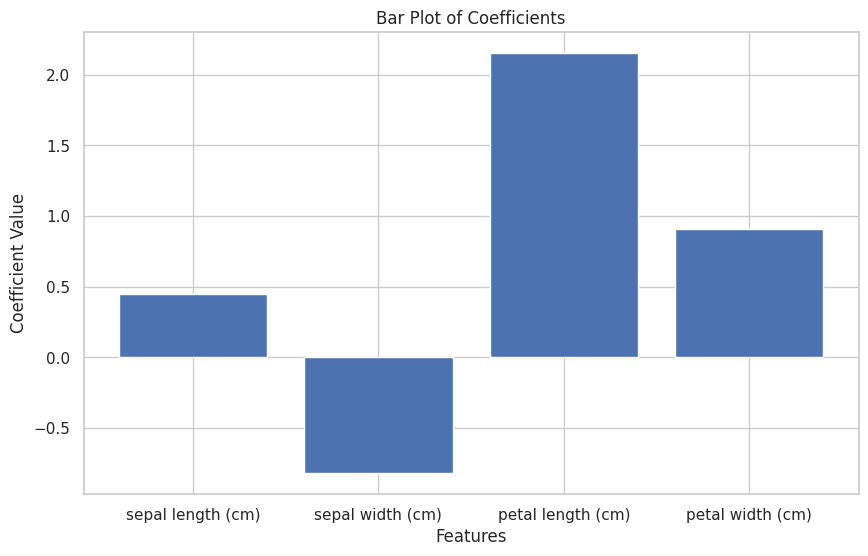

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 1. Load dataset (Iris dataset for classification example)
data = load_iris()
X = data.data
y = data.target

# For simplicity, we’ll use only two classes (binary classification)
X = X[y != 2]  # Exclude class 2
y = y[y != 2]

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Get the coefficients from the trained model
coefficients = model.coef_.flatten()  # Flatten if there are multiple classes

# 5. Create a bar plot of the coefficients
feature_names = data.feature_names
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients)
plt.title('Bar Plot of Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()


Evaluate Model Performance

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[17  0]
 [ 0 13]]
AUC: 1.0


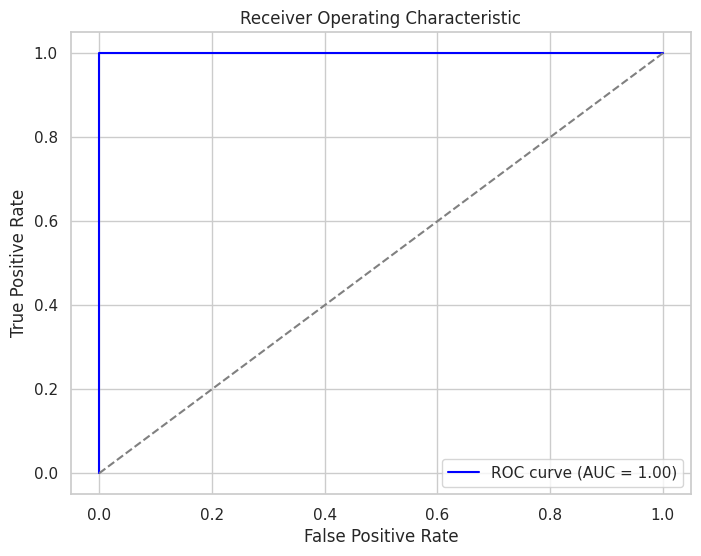

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Evaluate the model on the test set
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve for binary classification
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


Partial Dependence Analysis

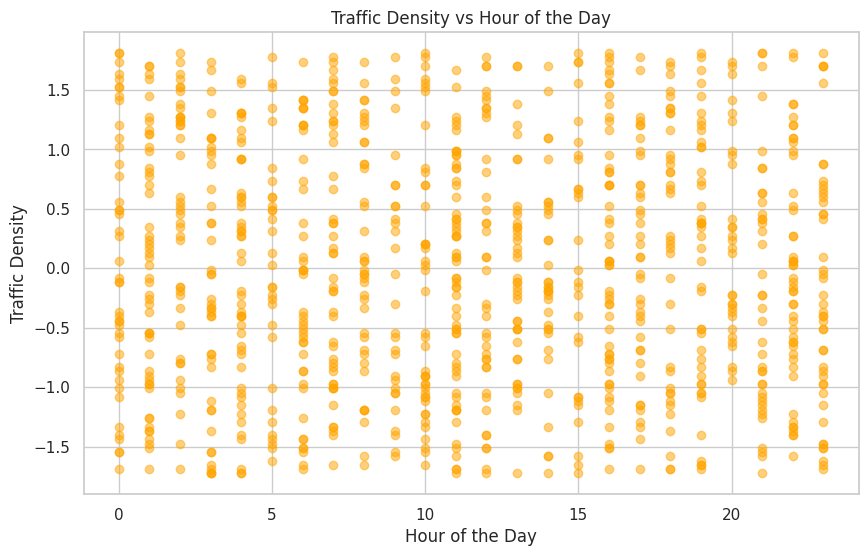

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(final_df['hour'], final_df['Traffic_Density'], alpha=0.5, color='orange')
plt.xlabel("Hour of the Day")
plt.ylabel("Traffic Density")
plt.title("Traffic Density vs Hour of the Day")
plt.show()



Heatmap of Traffic by Day and Hour

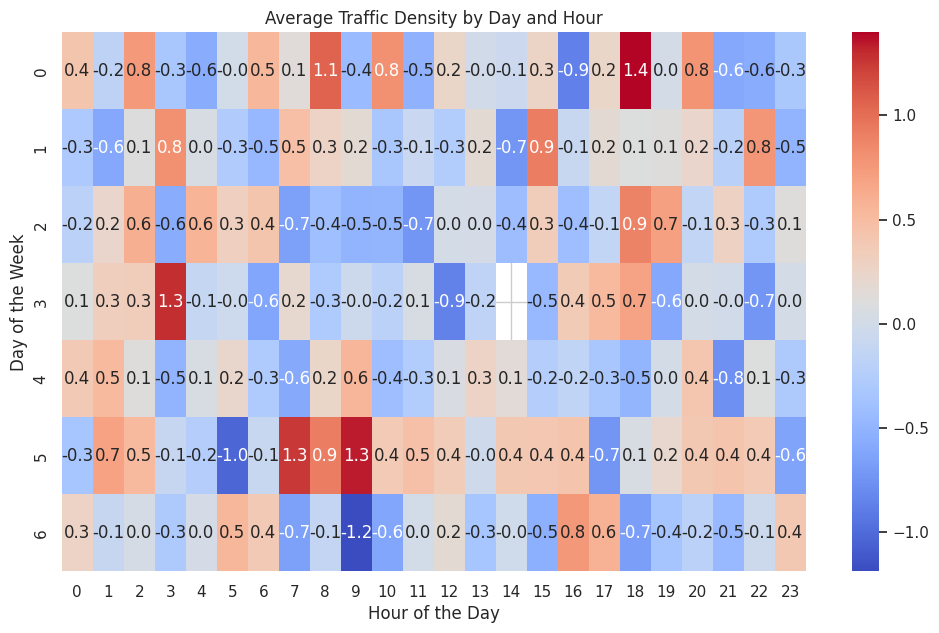

In [ ]:
import seaborn as sns

heatmap_data = final_df.groupby(['day_of_week', 'hour'])['Traffic_Density'].mean().unstack()
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", cbar=True)
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Average Traffic Density by Day and Hour")
plt.show()
